In [1]:
using LsqFit
using PyPlot

In [69]:
# QUICKSORT FOR A traditional row-based array with multiple columns
function quicksort2D(a)#,left,right)
    
    lena = length(a[:,1])
#    a0 = zeros(Float64,1,lena)
    
    if(lena < 2)
        return a
    end
    
    if(lena == 2)
        if(a[1,1] > a[2,1])
            a[1,:],a[2,:] = a[2,:],a[1,:]
        end
        return a
    end
         
    if(lena > 2)
        pivot = a[div(lena,2)]
        i = 1
        j = lena

        while(i <= j)
            
            while(a[i,1] < pivot)
                i = i + 1
            end
            
            while(a[j,1] > pivot)
                j = j - 1
            end

            if(i <= j)
                a[i,:], a[j,:] = a[j,:], a[i,:]
                i = i + 1
                j = j - 1
            end
        end

        a[1:i,:] = quicksort2D(a[1:i,:])
        a[i:end,:] = quicksort2D(a[i:end,:]) 

    end
   
    return a
    
end

quicksort2D (generic function with 1 method)

In [64]:
a = zeros(Float64,1000000,2)
for i in 1:1000000
    a[i,1] = rand()
end

b = zeros(Float64,1000000,2)
for i in 1:1000000
    b[i,1] = rand()
end

In [65]:
a

1000000x2 Array{Float64,2}:
 0.953329   0.0
 0.938848   0.0
 0.12966    0.0
 0.0367689  0.0
 0.0880469  0.0
 0.828386   0.0
 0.768748   0.0
 0.152484   0.0
 0.609848   0.0
 0.575182   0.0
 0.852282   0.0
 0.15094    0.0
 0.802884   0.0
 ⋮             
 0.125223   0.0
 0.919907   0.0
 0.573447   0.0
 0.690217   0.0
 0.765555   0.0
 0.471685   0.0
 0.0377195  0.0
 0.101412   0.0
 0.133898   0.0
 0.0902464  0.0
 0.396811   0.0
 0.0764967  0.0

In [66]:
#@time quicksort2D(a)
@time sortrows(a, by=x->x[1])

  8.846460 seconds (94.12 M allocations: 1.492 GB, 7.69% gc time)


1000000x2 Array{Float64,2}:
 9.94057e-7  0.0
 5.41102e-6  0.0
 6.84952e-6  0.0
 6.99643e-6  0.0
 8.15518e-6  0.0
 1.00501e-5  0.0
 1.26354e-5  0.0
 1.43445e-5  0.0
 1.47344e-5  0.0
 1.54046e-5  0.0
 1.66679e-5  0.0
 1.73928e-5  0.0
 1.74628e-5  0.0
 ⋮              
 0.999991    0.0
 0.999991    0.0
 0.999992    0.0
 0.999993    0.0
 0.999994    0.0
 0.999996    0.0
 0.999996    0.0
 0.999996    0.0
 0.999997    0.0
 0.999998    0.0
 1.0         0.0
 1.0         0.0

In [67]:
@time quicksort2D(b)

  3.039943 seconds (48.04 M allocations: 2.409 GB, 26.42% gc time)


1000000x2 Array{Float64,2}:
 1.27218e-6  0.0
 1.40103e-6  0.0
 3.17222e-6  0.0
 5.87567e-6  0.0
 6.07431e-6  0.0
 6.28246e-6  0.0
 6.292e-6    0.0
 8.2119e-6   0.0
 1.11152e-5  0.0
 1.16548e-5  0.0
 1.19467e-5  0.0
 1.23565e-5  0.0
 1.36386e-5  0.0
 ⋮              
 0.999988    0.0
 0.999988    0.0
 0.999989    0.0
 0.999994    0.0
 0.999995    0.0
 0.999996    0.0
 0.999997    0.0
 0.999998    0.0
 0.999998    0.0
 0.999999    0.0
 0.999999    0.0
 1.0         0.0

In [6]:
#Data import
pldata = readdlm("mystery_planet.txt")
time_data = pldata[:,1]
RV_data = pldata[:,2]
err_data = pldata[:,3]

59-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.3
 1.3
 1.2
 1.1
 1.1
 1.1
 1.2
 1.2
 1.1
 1.2
 ⋮  
 1.0
 1.2
 1.3
 1.3
 1.3
 1.2
 1.3
 1.4
 1.5
 1.2
 1.1
 1.4

In [7]:
#Sort by phase, given period
phase = Array(Real,length(time_data))
period = 10.
phase = mod(time_data,period)

59-element Array{Float64,1}:
 3.82196
 3.82264
 3.82336
 5.16632
 5.16702
 5.16775
 0.12242
 0.12308
 0.12372
 1.11653
 1.11724
 1.11797
 9.10185
 ⋮      
 6.7334 
 7.73062
 1.94048
 2.72022
 2.7208 
 2.72139
 3.02461
 3.02698
 3.03026
 5.72624
 8.73474
 5.1871 

In [8]:
phase_data_arr1 = [phase RV_data] #combine arrays
@time phase_sorted1 = sortrows(phase_data_arr1, by=x->x[1]) #sort by phase
#phase_sorted2 = sort(phase_data_arr,1) #sort by phase

  0.252925 seconds (266.04 k allocations: 12.020 MB)


59x2 Array{Float64,2}:
 0.12242   321.0
 0.12308   318.4
 0.12372   319.2
 1.11653   290.6
 1.11724   291.0
 1.11797   291.7
 1.16959    95.0
 1.80566   -30.5
 1.84867  -237.2
 1.94048  -113.1
 2.72022  -177.0
 2.7208   -170.0
 2.72139  -172.8
 ⋮              
 7.00429    68.3
 7.16184    12.3
 7.18024  -180.8
 7.73062  -237.0
 7.92941  -221.9
 8.10796  -213.6
 8.73474  -142.7
 8.8737   -227.3
 9.10185    90.7
 9.1025     91.1
 9.10312    87.7
 9.16606    46.7

In [9]:
phase_data_arr2 = [phase RV_data] #combine arrays
@time phase_sorted2 = sortrows(phase_data_arr2, by=x->x[1]) #sort by phase

  0.000974 seconds (1.50 k allocations: 30.648 KB)


59x2 Array{Float64,2}:
 0.12242   321.0
 0.12308   318.4
 0.12372   319.2
 1.11653   290.6
 1.11724   291.0
 1.11797   291.7
 1.16959    95.0
 1.80566   -30.5
 1.84867  -237.2
 1.94048  -113.1
 2.72022  -177.0
 2.7208   -170.0
 2.72139  -172.8
 ⋮              
 7.00429    68.3
 7.16184    12.3
 7.18024  -180.8
 7.73062  -237.0
 7.92941  -221.9
 8.10796  -213.6
 8.73474  -142.7
 8.8737   -227.3
 9.10185    90.7
 9.1025     91.1
 9.10312    87.7
 9.16606    46.7

In [10]:
newsorted1 = [phase RV_data] #combine arrays
@time quicksort2D(newsorted1)#,1,length(newsorted[:,1]))

  0.165595 seconds (151.17 k allocations: 7.161 MB)


59x2 Array{Float64,2}:
 0.12242   321.0
 0.12308   318.4
 0.12372   319.2
 1.11653   290.6
 1.11724   291.0
 1.11797   291.7
 1.16959    95.0
 1.80566   -30.5
 1.84867  -237.2
 1.94048  -113.1
 2.72022  -177.0
 2.7208   -170.0
 2.72139  -172.8
 ⋮              
 7.00429    68.3
 7.16184    12.3
 7.18024  -180.8
 7.73062  -237.0
 7.92941  -221.9
 8.10796  -213.6
 8.73474  -142.7
 8.8737   -227.3
 9.10185    90.7
 9.1025     91.1
 9.10312    87.7
 9.16606    46.7

In [11]:
newsorted2 = [phase RV_data] #combine arrays
@time quicksort2D(newsorted2)#,1,length(newsorted[:,1]))

  0.000069 seconds (1.21 k allocations: 66.750 KB)


59x2 Array{Float64,2}:
 0.12242   321.0
 0.12308   318.4
 0.12372   319.2
 1.11653   290.6
 1.11724   291.0
 1.11797   291.7
 1.16959    95.0
 1.80566   -30.5
 1.84867  -237.2
 1.94048  -113.1
 2.72022  -177.0
 2.7208   -170.0
 2.72139  -172.8
 ⋮              
 7.00429    68.3
 7.16184    12.3
 7.18024  -180.8
 7.73062  -237.0
 7.92941  -221.9
 8.10796  -213.6
 8.73474  -142.7
 8.8737   -227.3
 9.10185    90.7
 9.1025     91.1
 9.10312    87.7
 9.16606    46.7

In [12]:
newsorted3 = [phase RV_data]
@time quicksort2D(newsorted3)#,1,length(newsorted[:,1]))

  0.000070 seconds (1.21 k allocations: 66.750 KB)


59x2 Array{Float64,2}:
 0.12242   321.0
 0.12308   318.4
 0.12372   319.2
 1.11653   290.6
 1.11724   291.0
 1.11797   291.7
 1.16959    95.0
 1.80566   -30.5
 1.84867  -237.2
 1.94048  -113.1
 2.72022  -177.0
 2.7208   -170.0
 2.72139  -172.8
 ⋮              
 7.00429    68.3
 7.16184    12.3
 7.18024  -180.8
 7.73062  -237.0
 7.92941  -221.9
 8.10796  -213.6
 8.73474  -142.7
 8.8737   -227.3
 9.10185    90.7
 9.1025     91.1
 9.10312    87.7
 9.16606    46.7

In [13]:
[phase RV_data]

59x2 Array{Float64,2}:
 3.82196  -217.7
 3.82264  -221.0
 3.82336  -217.8
 5.16632  -203.3
 5.16702  -204.2
 5.16775  -203.6
 0.12242   321.0
 0.12308   318.4
 0.12372   319.2
 1.11653   290.6
 1.11724   291.0
 1.11797   291.7
 9.10185    90.7
 ⋮              
 6.7334   -238.4
 7.73062  -237.0
 1.94048  -113.1
 2.72022  -177.0
 2.7208   -170.0
 2.72139  -172.8
 3.02461   379.9
 3.02698   382.7
 3.03026   386.1
 5.72624  -185.9
 8.73474  -142.7
 5.1871     24.3

In [14]:
plot(phase_data_arr[:,1],phase_data_arr[:,2],".")

LoadError: LoadError: UndefVarError: phase_data_arr not defined
while loading In[14], in expression starting on line 1

In [15]:
period = linspace(1,3500,100000)
sum = Array(Real,length(period))

for (j,P) in enumerate(period)
    sum[j] = 0.0
    #Sort by phase given period
    phase = Array(Real,length(time_data))
    phase = mod(time_data,P)
    phase_data_arr = [phase RV_data] #combine arrays
    phase_sorted = sortrows(phase_data_arr, by=x->x[1]) #sort by phase
    for i in 2:length(time_data)
        sum[j] += (phase_sorted[i,2]-phase_sorted[i-1,2])*(phase_sorted[i,2]-phase_sorted[i-1,2])
    end
end
sum

100000-element Array{Real,1}:
 2.58033e6
 3.21359e6
 3.02553e6
 3.14458e6
 3.03096e6
 3.8313e6 
 3.94352e6
 3.38432e6
 3.59938e6
 3.4122e6 
 2.62869e6
 3.32299e6
 2.87204e6
 ⋮        
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6

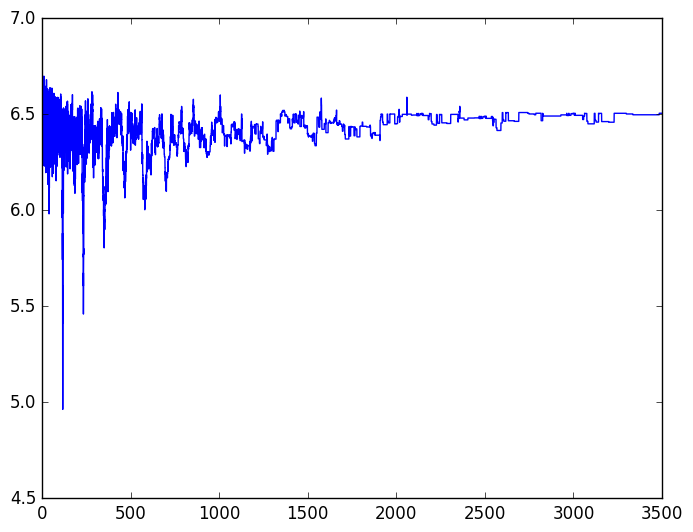

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f96667d9320>

In [16]:
plot(period,log10(sum))

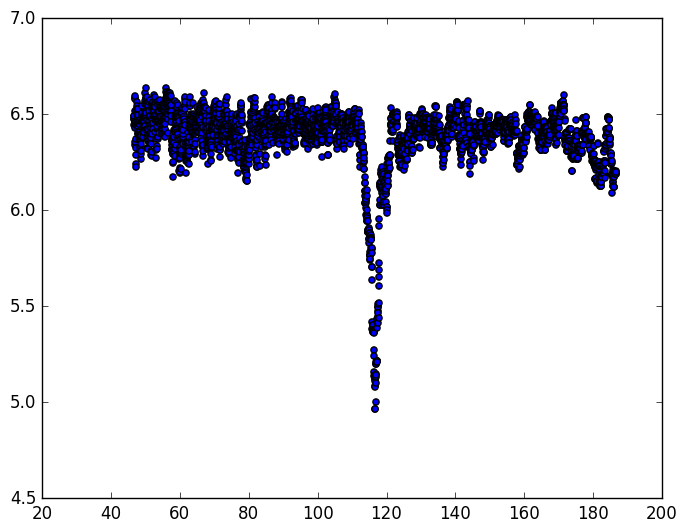

PyObject <matplotlib.collections.PathCollection object at 0x7f9668c56fd0>

In [17]:
min_index=indmin(sum)
min_per=period[min_index]
npts = 2000
scatter(period[min_index-npts:min_index+npts],log10(sum[min_index-npts:min_index+npts]))

In [18]:
P = min_per
sum = 0.0
#Sort by phase given period
phase = Array(Real,length(time_data))
phase = mod(time_data,P)
phase_data_arr = [phase RV_data] #combine arrays
phase_sorted = sortrows(phase_data_arr, by=x->x[1]) #sort by phase
for i in 2:length(time_data)
    sum += (phase_sorted[i,2]-phase_sorted[i-1,2])*(phase_sorted[i,2]-phase_sorted[i-1,2])
end

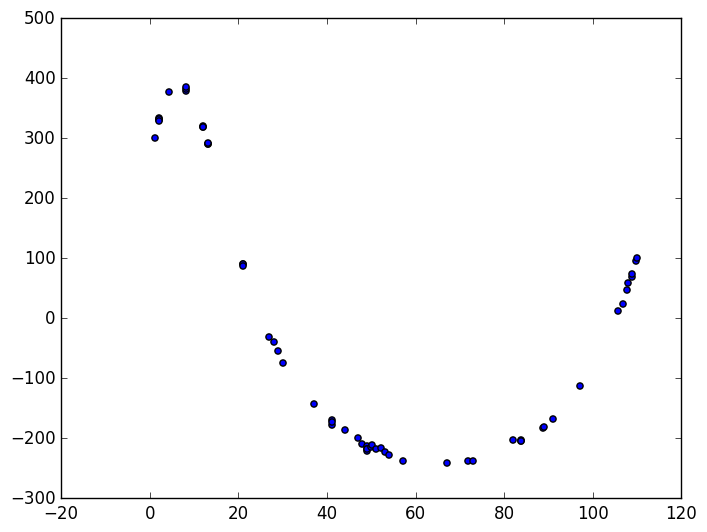

PyObject <matplotlib.collections.PathCollection object at 0x7f966fd69978>

In [19]:
scatter(phase_sorted[:,1],phase_sorted[:,2])

### K, $\varpi, \gamma$ Analytical Solution

In [20]:
; pwd

/home/linc/Documents/SCHOOL/598_exoplanets/ExoJulia/Homework/hw2/Andrew_Spencer


In [21]:
# THIS DOESN'T WORK. WORKING AROUND IT (FOLLOWING CELL)
push!(LOAD_PATH, "/home/linc/Documents/SCHOOL/598_exoplanets/ExoJulia/ExoJulia/")
# import
using ExoJulia

# Call kepler_solve!()
#M = 0.1;
#ecc = 0.0;
#E = ExoJulia.Orbit.kepler_solve!(M, ecc)

LoadError: LoadError: ArgumentError: ExoJulia not found in path
while loading In[21], in expression starting on line 4

In [22]:
include("/home/linc/Documents/SCHOOL/598_exoplanets/ExoJulia/ExoJulia/Orbit/orbit.jl")

Orbit

In [23]:
# Call kepler_solve!()
M = 0.1;
ecc = 0.0;
E = Orbit.kepler_solve!(M, ecc)

0.1

In [24]:
#Functions
function f_func(time,ecc,period,time_peri)
    M = 2*pi/period*(time-time_peri)
    E = Orbit.kepler_solve!(M,ecc)
    f = 2*atan(sqrt((1+ecc)/(1-ecc))*tan(E/2))
    f   
end

f_func (generic function with 1 method)

In [25]:
#Will loop over these
ecc = 0.1
time_peri = 0.0

0.0

In [26]:
testarr = Array(Real,4,8)
testarr[:,:] = 1.0
testarr[:,1]

4-element Array{Real,1}:
 1.0
 1.0
 1.0
 1.0

In [27]:
F = Array(Real,4,length(time_data))

for i in 1:length(time_data)
    F[1,i] = cos(f_func(time_data[i],ecc,P,time_peri))
    F[2,i] = sin(f_func(time_data[i],ecc,P,time_peri))
    F[3,i] = 1.0
    F[4,i] = time_data[i]-time_data[1]
end

W = zeros(Real,length(time_data),length(time_data))
#W[:,:] = 0.0

for i in 1:length(time_data)
    W[i,i] = (err_data[i])^(-2)
end

B = RV_data'*W*F'*inv(F*W*F')

#B = {h,c,v0,d}
h = B[1]
c = B[2]
v0 = B[3]
K = sqrt(h*h + c*c)
curlypi = atan(-c/h)
gam = v0 - K*ecc*cos(curlypi)

-40.75528673939226

In [28]:
F

4x59 Array{Real,2}:
 -0.91697   -0.916983  -0.916996   -0.380286  …    -0.564969     0.802629
  0.398955   0.398927   0.398897   -0.924869        0.825112    -0.596479
  1.0        1.0        1.0         1.0             1.0          1.0     
  0.0        0.00068    0.0014    151.344        2554.91      2741.37    